#Using an ARIMA model to project future cost and leads

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('icims_byday.csv',index_col='Day',parse_dates=True,skiprows=2)

In [2]:
df.head()

,Account,Currency,Conversions,Cost,Search Impr. share,Clicks,Impressions
Day,,,,,,,
2017-07-13,Google - Recruit - Desktop,USD,24.53,8433.04,67.47%,659,"18,556"
2017-07-17,Google - Recruit - Desktop,USD,17.03,6929.43,65.86%,576,"18,266"
2017-08-03,Google - Recruit - Desktop,USD,16.75,7293.85,77.03%,489,"14,594"
2017-08-09,Google - Recruit - Desktop,USD,27.50,7838.70,77.52%,514,"13,550"
2017-10-03,Google - Recruit - Desktop,USD,17.27,13060.14,75.77%,676,"22,289"


In [3]:
#Need to clean data first
df['CPA']=df['Cost']/df['Conversions']
df['CTR']=df['Clicks']/df['Impressions']
df['CPC']=df['Cost']/df['Clicks']

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [4]:
#turning data into stationary time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
stationary_data = df['Conversions'].diff().diff(periods=12)[13:]
x=plot_acf(stationary_data,lags=40)

In [6]:
#Predicting for Conversions
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Conversions'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Conversions   No. Observations:                  935
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3475.101
Method:                       css-mle   S.D. of innovations              9.916
Date:                Wed, 28 Aug 2019   AIC                           6958.201
Time:                        15:00:07   BIC                           6977.563
Sample:                             1   HQIC                          6965.584
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0018      0.001     -1.382      0.167      -0.004       0.001
ar.L1.D.Conversions     0.0766      0.033      2.347      0.019       0.013       0.141
ma.L1.D.Conversi

In [7]:
results.forecast()

(array([13.05992956]),
 array([9.91620295]),
 array([[-6.37547109, 32.49533021]]))

In [8]:
results.forecast(steps=31)

(array([13.05992956, 13.59909399, 13.63873893, 13.64011847, 13.63856671,
        13.6367904 , 13.63499688, 13.63320205, 13.63140712, 13.62961218,
        13.62781724, 13.6260223 , 13.62422735, 13.62243241, 13.62063747,
        13.61884253, 13.61704759, 13.61525265, 13.61345771, 13.61166277,
        13.60986782, 13.60807288, 13.60627794, 13.604483  , 13.60268806,
        13.60089312, 13.59909818, 13.59730324, 13.5955083 , 13.59371335,
        13.59191841]),
 array([9.91620295, 9.9452558 , 9.94542605, 9.94542705, 9.94542705,
        9.94542705, 9.94542705, 9.94542705, 9.94542705, 9.94542705,
        9.94542705, 9.94542705, 9.94542705, 9.94542705, 9.94542705,
        9.94542705, 9.94542705, 9.94542705, 9.94542705, 9.94542705,
        9.94542705, 9.94542705, 9.94542705, 9.94542705, 9.94542705,
        9.94542705, 9.94542705, 9.94542705, 9.94542705, 9.94542705,
        9.94542705]),
 array([[-6.37547109, 32.49533021],
        [-5.8932492 , 33.09143718],
        [-5.85393793, 33.1314158 ],
 

In [9]:
results.aic

6958.20128310291

In [10]:
all = results.forecast(steps=31)[0][0:30]

In [11]:
#how many conversions next month
sum(all)

407.9577622010219

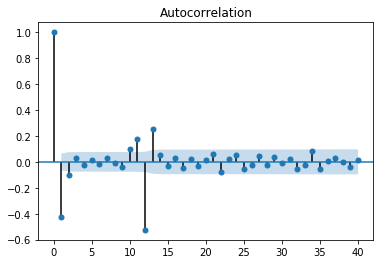

In [12]:
#Predicted for Cost
stationary_data2 = df['Cost'].diff().diff(periods=12)[13:]
x2=plot_acf(stationary_data2,lags=40)

In [13]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model2 = ARIMA(df['Cost'], order=(2, 1, 1))
results2 = model2.fit()
print(results2.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Cost   No. Observations:                  935
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9077.031
Method:                       css-mle   S.D. of innovations           3966.171
Date:                Wed, 28 Aug 2019   AIC                          18164.063
Time:                        15:00:15   BIC                          18188.265
Sample:                             1   HQIC                         18173.291
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9912      0.521     -1.903      0.057      -2.012       0.030
ar.L1.D.Cost     0.0935      0.033      2.858      0.004       0.029       0.158
ar.L2.D.Cost    -0.0146      0.033     -0.44

In [14]:
results2.forecast()

(array([5260.09736328]),
 array([3966.17086647]),
 array([[-2513.45469153, 13033.6494181 ]]))

In [15]:
results2.forecast(steps=31)

(array([5260.09736328, 5655.18998674, 5628.04720996, 5618.83879514,
        5617.46035126, 5616.55271586, 5615.5750027 , 5614.58387599,
        5613.59251622, 5612.60133012, 5611.61016367, 5610.61899651,
        5609.62782901, 5608.63666148, 5607.64549396, 5606.65432643,
        5605.66315891, 5604.67199138, 5603.68082386, 5602.68965634,
        5601.69848881, 5600.70732129, 5599.71615377, 5598.72498624,
        5597.73381872, 5596.7426512 , 5595.75148367, 5594.76031615,
        5593.76914862, 5592.7779811 , 5591.78681358]),
 array([3966.17086647, 3983.4838619 , 3983.55015811, 3983.55708853,
        3983.55709549, 3983.55710106, 3983.5571038 , 3983.55710609,
        3983.55710838, 3983.55711067, 3983.55711296, 3983.55711526,
        3983.55711755, 3983.55711984, 3983.55712213, 3983.55712443,
        3983.55712672, 3983.55712901, 3983.5571313 , 3983.5571336 ,
        3983.55713589, 3983.55713818, 3983.55714047, 3983.55714277,
        3983.55714506, 3983.55714735, 3983.55714965, 3983.557

In [16]:
results2.aic

18164.06257764926

In [17]:
all2 = results2.forecast(steps=31)[0][0:30]

In [18]:
#how many conversions next month
sum(all2)

167896.420598405

In [19]:
sum(all2)/sum(all)

411.5534404654219